In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import joblib

In [2]:
#load csv file
data = pd.read_csv('StudentsPerformance.csv')

### Display Top 5 Rows of The Dataset

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


 ### Display Last 5 Rows of The Dataset

In [4]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


### Find Shape of Our Dataset (Number of Rows And Number of Columns)


In [5]:
data.shape

(1000, 8)

In [6]:
print("No. of rows is :", data.shape[0])
print("No. of columns is :", data.shape[1])

No. of rows is : 1000
No. of columns is : 8


### Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Check Null Values In The Dataset

In [8]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### chek the duplicates in Dataset

In [9]:
data.duplicated().sum()

np.int64(0)

### Get Overall Statistics About The Dataframe

In [10]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### calculates the mean of math score, reading score, and writing score.

In [11]:
data[['math score','reading score','writing score']].mean()	

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

### calculates the mean of math score, reading score, and writing score based on gender

In [12]:
data.groupby('gender')[['math score','reading score','writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


### Create a new column called average_score that calculates the mean of math score, reading score, and writing score.

In [13]:
data['average_score']=data[['math score','reading score','writing score']].mean(axis=1)

In [14]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


### What is the average overall performance of students based on their gender?

In [15]:
data.groupby('gender')['average_score'].mean()

gender
female    69.569498
male      65.837483
Name: average_score, dtype: float64

**On average, female students outperformed male students by approximately 3.73 points in their overall scores (69.57 vs 65.84).**

### Which ethnic group has the highest and lowest average performance, and is the gap between them large?

In [16]:
data.groupby('race/ethnicity')['average_score'].mean().sort_values(ascending=False)

race/ethnicity
group E    72.752381
group D    69.179389
group C    67.131661
group B    65.468421
group A    62.992509
Name: average_score, dtype: float64

**Group E** has the **highest average score 72.75**, while **Group A** has the **lowest 62.99**, resulting in a gap of nearly 10 points.

### What is the average overall performance of students based on their parental level of education?

In [17]:
data.groupby('parental level of education')['average_score'].mean().sort_values(ascending = False)

parental level of education
master's degree       73.598870
bachelor's degree     71.923729
associate's degree    69.569069
some college          68.476401
some high school      65.108007
high school           63.096939
Name: average_score, dtype: float64

The data reveals a linear relationship between parental education and student scores. As the **level of education increases, the average_score of the students also increases**. Students whose parents hold a Master's degree achieved the highest average (73.60), while those whose parents only attended high school had the lowest average (63.10)

### Does taking a test preparation course help 'level the playing field' for students whose parents have only a High School education?

In [18]:
data.groupby(['parental level of education', 'test preparation course'])['average_score'].mean()

parental level of education  test preparation course
associate's degree           completed                  74.939024
                             none                       66.423810
bachelor's degree            completed                  76.239130
                             none                       69.166667
high school                  completed                  66.964286
                             none                       61.550000
master's degree              completed                  76.316667
                             none                       72.205128
some college                 completed                  74.653680
                             none                       65.284116
some high school             completed                  69.337662
                             none                       61.915033
Name: average_score, dtype: float64

**Analysis shows that completing the test preparation course acts as a major leveler. Notably, students whose parents had the lowest level of education but completed the course 69.34 achieved higher average scores than students with Bachelor's degree parents who did not take the course 69.17**

### Can a student with a financial disadvantage (Free/Reduced Lunch) catch up to a student with a 'Standard' lunch if they complete the test prep course?

In [19]:
data.groupby(['lunch', 'test preparation course'])['average_score'].mean()

lunch         test preparation course
free/reduced  completed                  67.755725
              none                       58.949405
standard      completed                  75.505140
              none                       68.302233
Name: average_score, dtype: float64

**While wealth (Standard Lunch) provides a higher starting point, the test preparation course is the most effective tool for "Free/Reduced" students to bridge the performance gap**

### Does financial disadvantage affect Math scores more than Reading or Writing scores?

In [20]:
data.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


**The data shows that financial status has a significant impact across all subjects, but it is most severe in Math.**

In [21]:
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
540,male,group C,high school,standard,completed,75,69,68,70.666667
856,male,group B,some college,free/reduced,none,75,68,65,69.333333
539,male,group A,associate's degree,standard,completed,97,92,86,91.666667
926,male,group E,associate's degree,free/reduced,none,64,56,52,57.333333
12,female,group B,high school,standard,none,65,81,73,73.000000


### Is the dataset balanced between Male and Female students, or will the model be biased toward one gender?

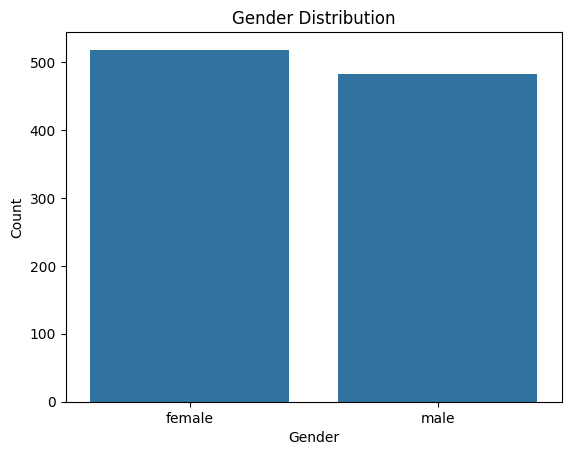

In [22]:
sns.countplot(x='gender', data=data)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

### Which Race/Ethnicity group is the most represented in this school, and which is the least?

<Axes: xlabel='race/ethnicity', ylabel='count'>

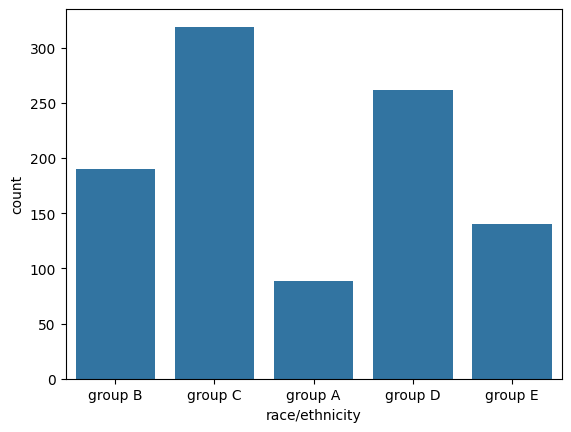

In [23]:
sns.countplot(x='race/ethnicity', data=data)

### cheking for contienous columnns and categorical columns

In [24]:
cat_col = []
cont_col = []

for col in data.columns:
    if data[col].nunique()>10:
        cont_col.append(col)
    else:
        cat_col.append(col)
print("contienous columns are:", cont_col)
print("categorical columns are:", cat_col)

contienous columns are: ['math score', 'reading score', 'writing score', 'average_score']
categorical columns are: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### histogram for contineous columns

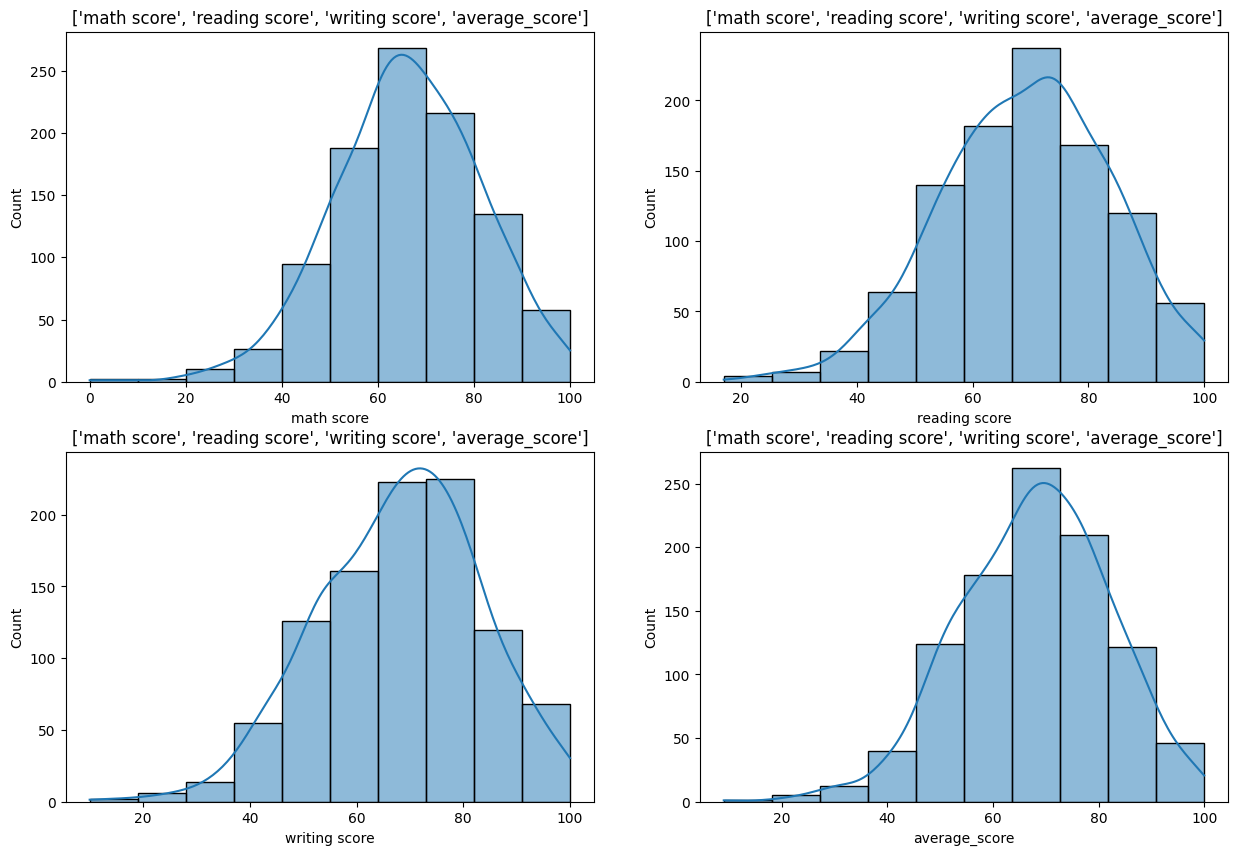

In [25]:
cont_col = ['math score', 'reading score', 'writing score', 'average_score']
plt.figure(figsize=(15,10))
i=1
for col in cont_col:
    plt.subplot(2,2,i)
    sns.histplot(data[col],kde=True, bins=10)
    plt.title(cont_col)
    i+=1
plt.show()

### Box plot for contineous columns

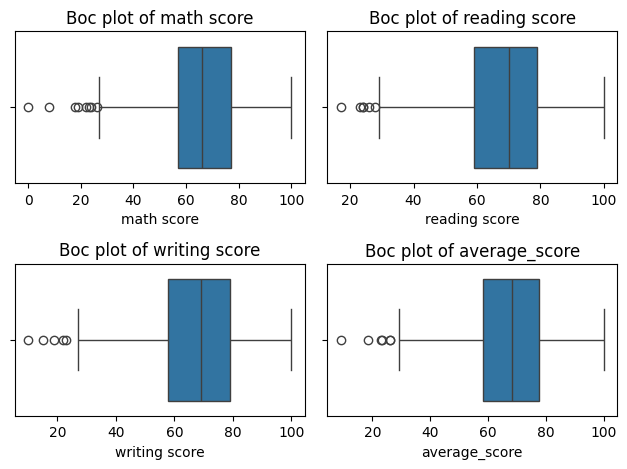

In [26]:
cont_col = ['math score', 'reading score', 'writing score', 'average_score']
i=1
for col in cont_col:
    plt.subplot(2,2,i)
    sns.boxplot(x=data[col], data=data)
    plt.title(f"Boc plot of {col}")
    i+=1
plt.tight_layout()
plt.show()

### checking skewness of all contineous coluns

In [27]:
cont_col = ['math score', 'reading score', 'writing score', 'average_score']
for col in cont_col:
    skew_val = data[col].skew()
    
    if skew_val < 0:
        desc = "Left-Skewed (Negative)"
    elif skew_val > 0:
        desc = "Right-Skewed (Positive)"
    else:
        desc = "Perfectly Symmetrical"
        
    print(f"{col}: {skew_val:.4f} -> {desc}")

math score: -0.2789 -> Left-Skewed (Negative)
reading score: -0.2591 -> Left-Skewed (Negative)
writing score: -0.2894 -> Left-Skewed (Negative)
average_score: -0.2991 -> Left-Skewed (Negative)


**I chose the IQR (Interquartile Range) method for outlier removal because our data is negatively skewed, as confirmed by the calculated skewness values (e.g., math Score: -0.2789) and the left-side tails in the histograms. Since the Z-score method assumes a perfectly symmetrical normal distribution, it is less effective here; the extreme low scores would pull the mean downward, inaccurately shifting the "normal" range. By using IQR, which relies on the median and quartiles, we utilize a robust measurement that remains stable against extreme values. This ensures that the cleaning process accurately targets the specific anomalies identified in our box plots without being biased by the skewness of the overall student population.**

### using IQR method to remove outlier

In [28]:
# List of numerical columns to check for outliers
cont_col =['math score', 'reading score', 'writing score', 'average_score']

for col in cont_col:
    # calculate Quartiles and Interquartile Range (IQR)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1

    # Define upper and lower statistical boundaries
    lower_limit = Q1-1.5*IQR
    upper_limit = Q3+1.5*IQR

    #filter the data
    # Trim the dataset: Remove rows that fall outside these boundaries
    data = data[(data[col]>=lower_limit) & (data[col]<=upper_limit)]

print(f"Data cleaned! New shape: {data.shape}")

Data cleaned! New shape: (986, 9)


**For this analysis, outlier trimming was performed directly on the primary dataframe using the IQR method. While maintaining separate 'Raw' and 'Processed' dataframes is standard practice in complex pipelines to ensure data traceability, the minimal data loss (1.4%) and the linear nature of this notebook allowed for direct modification without compromising the integrity of the results. By removing these 14 extreme anomalies, we have effectively cleared the noise from the dataset, ensuring the model focuses on the core student population trends.**

### cheking outier using boxplot after removing outlier using IQR

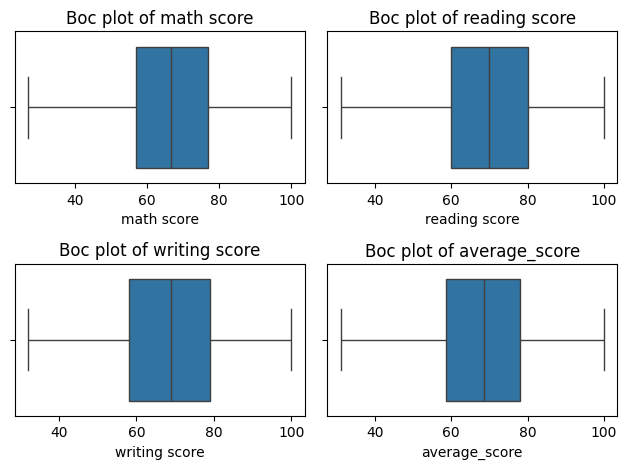

In [29]:
cont_col = ['math score', 'reading score', 'writing score', 'average_score']
i=1
for col in cont_col:
    plt.subplot(2,2,i)
    sns.boxplot(x=data[col], data=data)
    plt.title(f"Boc plot of {col}")
    i+=1
plt.tight_layout()
plt.show()

**The final dataset successfully integrates three distinct preprocessing techniques. First, IQR Trimming removed statistical noise (14 extreme outliers). Second, Ordinal Encoding and Mapping converted ranked categories like 'education' and 'test prep' into meaningful numerical scales. Finally, One-Hot Encoding transformed nominal features like 'race','gender', and 'lunch' into a binary format. This comprehensive translation ensures the data is now purely numerical, allowing machine learning algorithms to process every feature mathematically without losing any categorical context or implying false hierarchies**

## Feature Encoding

### Ordinal Encoding: For 'Parental Level of Education' (Ranked)

In [30]:
from sklearn.preprocessing import OrdinalEncoder
education_rank = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
oe = OrdinalEncoder(categories = [education_rank])
data['parental level of education'] = oe.fit_transform(data[['parental level of education']])

**For the feature 'parental level of education', I applied Ordinal Encoding rather than simple Label Encoding. Since education levels follow a clear hierarchy, it was essential to map them to a numerical scale (0 to 5) that preserves this order. This allows the machine learning model to capture the ordinal relationship between a parent's education level and the student's performance, which is a key structural pattern in the data.**

### Manual Mapping: For 'Test Preparation Course' (Binary)

In [31]:
data['test preparation course'] = data['test preparation course'].map({'none':0,'completed':1})

**I used Manual Mapping for the 'test preparation course' feature to ensure full control over the numerical assignment. By explicitly mapping 'none' to 0 and 'completed' to 1, I established a clear baseline for the model. This makes the final regression coefficients easy to interpret**

### One-Hot Encoding: For Gender, Race, and Lunch (Unranked)

In [32]:
data = pd.get_dummies(data, columns=['gender','race/ethnicity', 'lunch'], drop_first=True, dtype=int)

**One-Hot Encoding is a vital step in this project because most machine learning algorithms—especially Linear Regression—cannot process text or strings. They require numbers to perform calculations. Since features like Gender, Race, and Lunch are nominal (meaning they are just groups with no mathematical order), One-Hot Encoding translates them into a binary format that the computer can digest without creating a fake "ranking" between them.**

* **Pandas Dummies (pd.get_dummies):** This is the tool we use to explode a single categorical column into multiple new columns. For example, the lunch column disappears and is replaced by lunch_standard. Each row then gets a 1 if it belongs to that category and a 0 if it doesn't.
  
* **The drop_first=True Parameter:** This is used to prevent the Dummy Variable Trap. If we have two columns, gender_male and gender_female, they are perfectly correlated. If male is 0, we know female is 1. Including both creates **Multicollinearity**, which can confuse the model and make the mathematical results unstable. Dropping the first category keeps the data clean and statistically sound.

  
* **The dtype=int Parameter:** By default, newer versions of Pandas output True and False. While models understand this, setting dtype=int forces the output to be 0 and 1. This ensures a consistent numerical format across your entire dataframe, making it easier to read and less prone to "type errors" during the scaling and modeling phases.

In [33]:
data

,parental level of education,test preparation course,math score,reading score,writing score,average_score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard
0,4.0,0,72,72,74,72.666667,0,1,0,0,0,1
1,2.0,1,69,90,88,82.333333,0,0,1,0,0,1
2,5.0,0,90,95,93,92.666667,0,1,0,0,0,1
3,3.0,0,47,57,44,49.333333,1,0,0,0,0,0
4,2.0,0,76,78,75,76.333333,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.0,1,88,99,95,94.000000,0,0,0,0,1,1
996,1.0,0,62,55,55,57.333333,1,0,1,0,0,0
997,1.0,1,59,71,65,65.000000,0,0,1,0,0,0
998,2.0,1,68,78,77,74.333333,0,0,0,1,0,1


## Supervised Learning Approach

I am utilizing a Supervised Learning approach for this analysis. The primary condition for this choice is the existence of a clearly defined Target Variable (y), which in this case is the student's **average_score**. Because the objective is to build a model that can predict a continuous numerical outcome based on historical labeled data, Linear Regression (a supervised technique) is the most appropriate methodology. If the dataset lacked these performance scores and the goal was merely to find natural groupings among students, an Unsupervised approach like K-Means Clustering would have been required instead.

### split the data in x and y i.e input and target

In [34]:
x = data[['parental level of education', 'test preparation course',  'gender_male',
       'race/ethnicity_group B', 'race/ethnicity_group C', 'race/ethnicity_group D', 'race/ethnicity_group E', 'lunch_standard']]

y = data['average_score']

**The individual component scores (math, reading, writing) were removed from the input features (X) to prevent Data Leakage and ensured the model wasn't just performing a simple calculation. Since the average_score is directly calculated from those three columns, including them would have given the model the answers in advance, resulting in a fake 100% accuracy score of 1.0. This strategic removal forces the model to actually predict performance based on student background, providing a realistic and honest insight into how socio-economic factors truly impact success.**

### Perform Train-Test-Split

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

**We used train_test_split to divide our data into two distinct sets: 80% for training and 20% for testing. By setting a random_state=42, we ensure that our results are reproducible and consistent every time the code runs. This split is the golden rule of Machine Learning; it allows the model to learn patterns from the training set and then proves its actual intelligence by making predictions on the test set, which acts as unseen data it has never encountered before.**

### Peform Normalization i.e scaling

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

We use the **.fit()** function to train our models using **x_train_scaled** instead of raw data. We scale the data because models like **SVR** are distance-based and require all features to be on the same scale to work correctly; while optional for **Linear Regression**, scaling everything ensures a fair comparison.

We use **fit_transform** on **x_train** to learn the data's pattern and scale it at the same time. However, we only use **transform** on **x_test** to apply those same rules without letting the scaler "see" or learn anything new from the test set. If we had used the entire **x** instead of x_train, the mean and variance of the test data would leak into the training process. This Data Leakage would give us fake, over-optimistic results. By keeping these steps separate, we ensure our model is tested on truly unseen data, keeping our evaluation honest.

We do not scale the**target variable (y)** because it is the actual value we want to predict (the student's score). Scaling the features (X) helps the model learn better, but scaling the output would make the results hard to interpret. By leaving y in its original form, our final predictions remain in the actual 0 to 100 score range, making the model's performance easy to understand.

### Import Model

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

### Train Model

In [38]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [39]:
svr = SVR()
svr.fit(x_train_scaled, y_train)

,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm.If none is given, 'rbf' will be used. If a callable is given it isused to precompute the kernel matrix.For an intuitive visualization of different kernel typessee :ref:`sphx_glr_auto_examples_svm_plot_svm_regression.py`",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive.The penalty is a squared l2. For an intuitive visualization of theeffects of scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"epsilon epsilon: float, default=0.1Epsilon in the epsilon-SVR model. It specifies the epsilon-tubewithin which no penalty is associated in the training loss functionwith points predicted within a distance epsilon from the actualvalue. Must be non-negative.",0.1
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False
,"max_iter max_iter: int, default=-1Hard limit on iterations within solver, or -1 for no limit.",-1


In [40]:
rf = RandomForestRegressor()
rf.fit(x_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [41]:
gr = GradientBoostingRegressor()
gr.fit(x_train_scaled, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.1
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",100
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft 

In this step, we use the **.fit()** function to train our models using **x_train_scaled** instead of the raw data. This is where the algorithms learn the mathematical relationship between student backgrounds and their scores. We use the scaled version because it puts all features on the same level; if we used the raw x_train, variables with larger numerical ranges could unfairly bias the model. Scaling ensures every feature contributes equally, allowing the algorithms—from simple Linear Regression to complex Ensemble methods—to find the most accurate patterns more efficiently.

### Model Testing

In [42]:
y_predict_lr = lr.predict(x_test_scaled)
y_predict_svr = svr.predict(x_test_scaled)
y_predict_rf = rf.predict(x_test_scaled)
y_predict_gr = gr.predict(x_test_scaled)

We use the **.predict()** function on our **x_test_scaled** data to see how well each model performs on information it has never seen before. By passing the scaled test features through our trained models, we generate predicted scores for each student. We then compare these predictions against the actual scores (y_test) to calculate our accuracy and determine which algorithm—such as Linear Regression or Random Forest—is the most reliable for this dataset.

### compare model

In [43]:
df1=pd.DataFrame({'Actual':y_test, 'LR':y_predict_lr, 'SVR':y_predict_svr, 'RF':y_predict_rf, 'GR':y_predict_gr})
df1

,Actual,LR,SVR,RF,GR
623,94.000000,70.376541,71.397646,65.113087,72.035599
458,100.000000,76.621115,70.900138,66.470532,70.081428
741,50.000000,61.760774,62.389553,69.893082,63.200105
443,77.333333,70.611102,68.013917,63.089952,67.359038
280,49.000000,65.686664,66.613398,62.331611,64.073035
...,...,...,...,...,...
214,86.333333,74.475041,75.450642,77.202865,71.413203
514,89.333333,72.570575,70.766634,71.595278,73.258923
50,52.000000,69.297965,69.899780,68.340482,69.577500
727,58.666667,72.966193,74.886837,77.151467,78.229483


In this step, we use **.predict()** to see what scores our models estimate for students they've never seen before. We then create a comparison table to show the **Actual scores versus the predictions from LR, SVR, RF, and GR**. This allows us to visually inspect how close our models are to the truth; for example, if a student actually scored a 94, we can see which model came closest to that number. It’s the final test to see which algorithm truly understood the patterns in the data.

## Model Evaluation

In [44]:
#store prediction of all models in dictionary

predictions = {
    'Linear Regression': y_predict_lr,
    'SVR':y_predict_svr,
    'Random Forest': y_predict_rf,
    'Gradient Boosting': y_predict_gr
    }
#Loop through each model and calculate regerssion metrices

for model_name, y_predict in predictions.items():
    mae = mean_absolute_error(y_test,y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predict)

    print(f"--- {model_name} ---")
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squard Error (MSE):", mse)
    print("Root Mean Squard Error (RMSE):", rmse)
    print("R2-score:", r2)
    print("-"*50)

--- Linear Regression ---
Mean Absolute Error (MAE): 8.960845862619834
Mean Squard Error (MSE): 121.01015325307283
Root Mean Squard Error (RMSE): 11.000461501822222
R2-score: 0.34224024861457114
--------------------------------------------------
--- SVR ---
Mean Absolute Error (MAE): 9.480712695085925
Mean Squard Error (MSE): 135.7575926949889
Root Mean Squard Error (RMSE): 11.651506026904372
R2-score: 0.262079436979205
--------------------------------------------------
--- Random Forest ---
Mean Absolute Error (MAE): 9.946567323080803
Mean Squard Error (MSE): 157.6249342686863
Root Mean Squard Error (RMSE): 12.554876911729812
R2-score: 0.14321786404247094
--------------------------------------------------
--- Gradient Boosting ---
Mean Absolute Error (MAE): 9.649718724806924
Mean Squard Error (MSE): 142.07771720144456
Root Mean Squard Error (RMSE): 11.919635783086854
R2-score: 0.2277259268617745
--------------------------------------------------


**Linear Regression** is the top-performing model for this dataset. It achieved the highest **R2-score** (0.342) and the lowest **Mean Absolute Error** (8.96). In machine learning, a **higher R2-score** and a **lower MAE** are the two most important indicators of success. Linear Regression proved that it could explain more of the data's variance while keeping its average prediction error to less than 9 points.

## Saving the Trained Model and Scaler using Joblib

In [45]:
joblib.dump(lr,'LR_Model.pkl')

['LR_Model.pkl']

In [46]:
joblib.dump(sc,'StandardScaler.pkl')

['StandardScaler.pkl']

After evaluating multiple algorithms, **Linear Regression** was selected as the final model because it demonstrated the best performance, achieving an **R^2-score of 0.342** and the **lowest Mean Absolute Error (8.96)**. To ensure this model is functional for future use, we exported both the model **LR_Model.pkl** and the scaler **StandardScaler.pkl**. While the **model** contains the mathematical logic to capture relationships between student demographics and performance, the**StandardScaler** is a mandatory "translator." It ensures that all future input data is normalized using the exact same mean and variance parameters from the training phase. Without saving the scaler alongside the model, the system would misinterpret raw inputs, leading to highly inaccurate predictions.

## New dataset for testing

In [47]:
df = {'parental level of education':3.0, 'test preparation course':1,  'gender_male':1,
       'race/ethnicity_group B':0, 'race/ethnicity_group C':0, 'race/ethnicity_group D':1, 'race/ethnicity_group E':0, 'lunch_standard':1}
data_new=pd.DataFrame(df, index=[0])
data_new

,parental level of education,test preparation course,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,lunch_standard
0,3.0,1,1,0,0,1,0,1


**Loading saved model i.e'model' and 'scaler'**

In [60]:
model = joblib.load('LR_Model.pkl')
scaler = joblib.load('StandardScaler.pkl')

**Scale the data**
-**This converts our raw numbers into the format the model understands**

In [55]:
data_new_scaled = scaler.transform(data_new)

**predict using the scaled data**

In [65]:
result = model.predict(data_new_scaled)
print(result[0])

75.39028291232388


### Save the modified dataframe to a new CSV file

In [68]:
data.to_csv('student_perfromance_cleaned.csv', index=False) # 'index=False' prevents pandas from adding an extra column for the row numbers

print("Modified dataset saved successfully!")

Modified dataset saved successfully!
